# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv("C:/Users/Hanna/Desktop/DataLoves/data/yulu_rental.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

In [3]:
# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [4]:
print(df.shape)

(10886, 19)


In [5]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   casual       10886 non-null  int64  
 9   registered   10886 non-null  int64  
 10  count        10886 non-null  int64  
 11  date         10886 non-null  object 
 12  day          10886 non-null  int32  
 13  week         10886 non-null  UInt32 
 14  weekday_num  10886 non-null  int32  
 15  weekday      10886 non-null  object 
 16  year         10886 non-null  int32  
 17  month        10886 non-null  int32  
 18  hour       

In [7]:
df.index.to_series().diff().value_counts().head()

datetime
0 days 01:00:00     10820
0 days 02:00:00        36
12 days 01:00:00       13
11 days 01:00:00        8
0 days 03:00:00         5
Name: count, dtype: int64

Таким чином, наш датафрейм містить 10886 рядків та 19 стовпців, розмір - 1.4+ MB. Майже всі рядки йдуть з інтервалом 1 година, тобто дані погодинні, але в кількох місцях є пропуски (час перескочив одразу на 2, 3 години, або навіть на 11–12 днів).

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


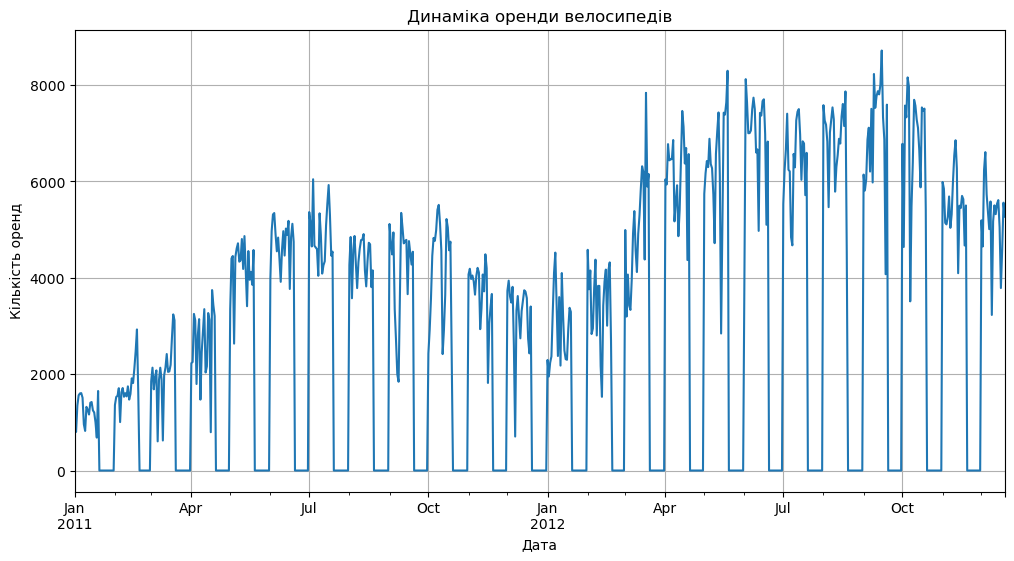

In [8]:
df_daily = df['count'].resample('D').sum()
ax = df_daily.plot(
    figsize=(12, 6), 
    title='Динаміка оренди велосипедів')
ax.set_xlabel("Дата")          
ax.set_ylabel("Кількість оренд")
ax.grid(True)

1. Ще під час попереднього аналізу я визначила, що дані містять пропуски, думаю саме ними спричинені ці заломи. Для того, щоб їх згладити можна подивитися дані на більшому часовому проміжку, наприклад, помісячно:

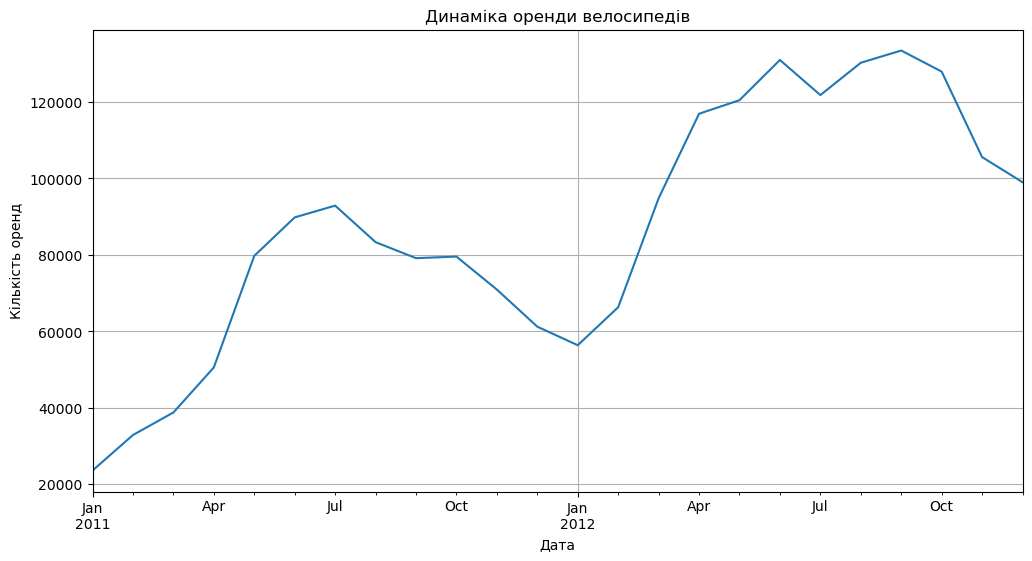

In [9]:
df_daily = df['count'].resample('ME').sum()
ax = df_daily.plot(
    figsize=(12, 6), 
    title='Динаміка оренди велосипедів')
ax.set_xlabel("Дата")          
ax.set_ylabel("Кількість оренд")
ax.grid(True)

2. Які загальні тенденції видно?
Відразу в очі кидається сильний сезонний тренд: взимку орендують рідко, з весни попит зростає, влітку/восени — він найвищий. Загалом у 2012 році попит вищий, ніж у 2011, що свідчить про те, що популярність сервісу зростає.
3. Чи помітні якісь сезонні коливання?
Як уже зазначалося так: взимку орендують рідко, з весни попит зростає, влітку/восени — він найвищий
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?
Є, і знову ж таки, вони легко пояснюються сезонними коливаннями.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [27]:
season_map = {
    1: "Зима",
    2: "Весна",
    3: "Літо",
    4: "Осінь"
}

df["Сезон"] = df["season"].map(season_map)

In [28]:
df["total_rentals"] = df["casual"] + df["registered"]
season_map = {1:"Зима", 2:"Весна", 3:"Літо", 4:"Осінь"}
season_order = ["Зима", "Весна", "Літо", "Осінь"]
df["Сезон"] = df["season"].map(season_map)
df["Сезон"] = pd.Categorical(df["Сезон"], categories=season_order, ordered=True)

avg_by_season = (
    df.groupby("Сезон", observed=True)["total_rentals"].mean()
      .reindex(season_order)
      .reset_index())

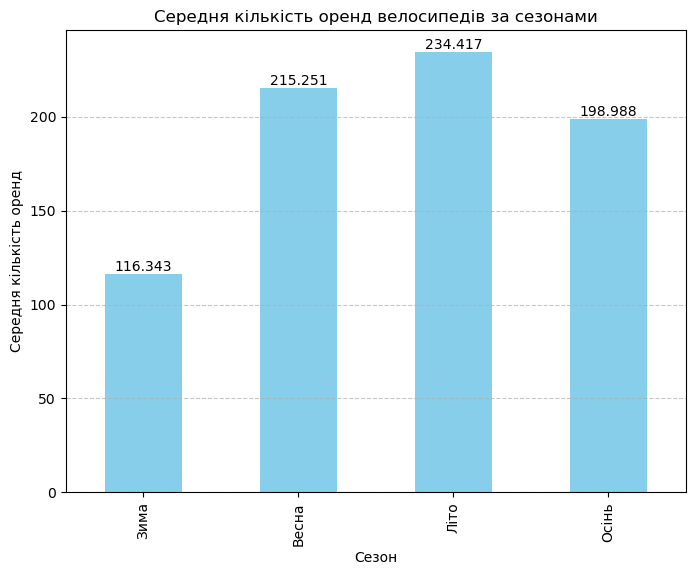

In [29]:
ax = avg_by_season.plot(
    x="Сезон",
    y="total_rentals",
    kind="bar",
    legend=False,
    title="Середня кількість оренд велосипедів за сезонами",
    figsize=(8,6),
    color="skyblue")

ax.set_xlabel("Сезон")
ax.set_ylabel("Середня кількість оренд")
for c in ax.containers:
    ax.bar_label(c, label_type="edge")
ax.grid(axis="y", linestyle="--", alpha=0.7)

- В який сезон найбільша середня кількість оренди велосипедів?
Влітку
- Як ви можете пояснити таку сезонну закономірність?
Краща погода та період відпусток спонукають людей більш активно користуватися велосипедом, як з метою хоббі/подорожей, так і з метою привести себе в форму т азабезпечити достатню фізичну активність.
- У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?
Оренда влітку на 71% виша, ніж узимку.

In [34]:
seasonal_rental_dif = 198.998 / 116.343
print(f"{seasonal_rental_dif:.2f}")

1.71


## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [35]:
avg_by_month = df.groupby("month")["total_rentals"].mean().reset_index()
month_map = {
    1:"Січень", 2:"Лютий", 3:"Березень", 4:"Квітень", 5:"Травень", 6:"Червень",
    7:"Липень", 8:"Серпень", 9:"Вересень", 10:"Жовтень", 11:"Листопад", 12:"Грудень"}

avg_by_month["Місяць"] = avg_by_month["month"].map(month_map)
month_order = ["Січень","Лютий","Березень","Квітень","Травень","Червень",
               "Липень","Серпень","Вересень","Жовтень","Листопад","Грудень"]

avg_by_month["Місяць"] = pd.Categorical(avg_by_month["Місяць"],
                                        categories=month_order,
                                        ordered=True)
avg_by_month = avg_by_month.sort_values("Місяць")

[Text(0, 0, 'Січень'),
 Text(1, 0, 'Лютий'),
 Text(2, 0, 'Березень'),
 Text(3, 0, 'Квітень'),
 Text(4, 0, 'Травень'),
 Text(5, 0, 'Червень'),
 Text(6, 0, 'Липень'),
 Text(7, 0, 'Серпень'),
 Text(8, 0, 'Вересень'),
 Text(9, 0, 'Жовтень'),
 Text(10, 0, 'Листопад'),
 Text(11, 0, 'Грудень')]

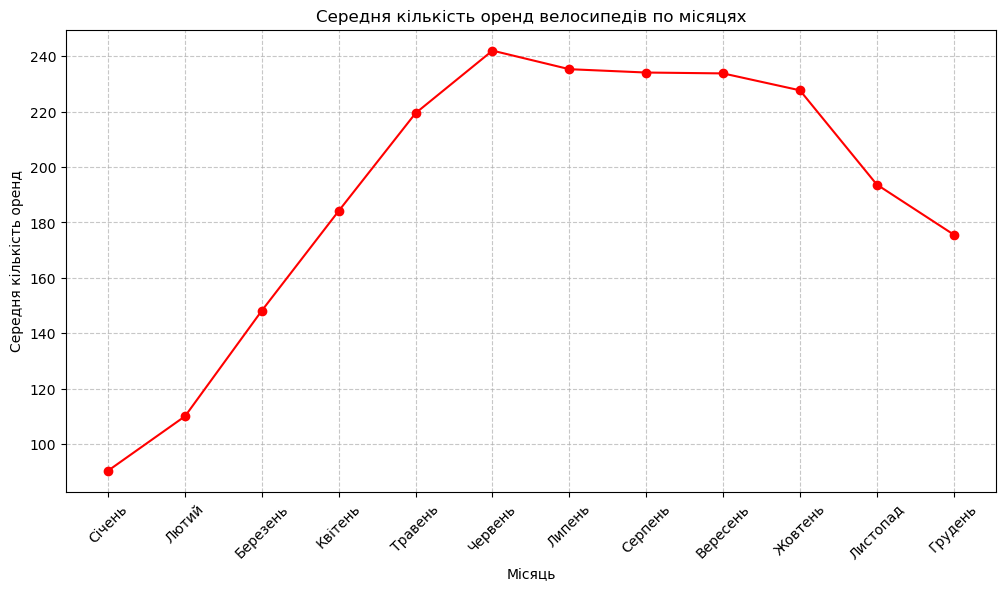

In [42]:
ax = avg_by_month.plot(
    x="Місяць",
    y="total_rentals",
    kind="line",
    legend=False,
    marker="o",
    color="red",
    title="Середня кількість оренд велосипедів по місяцях",
    figsize=(12,6))
ax.set_xlabel("Місяць")
ax.set_ylabel("Середня кількість оренд")
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_xticks(range(len(avg_by_month)))
ax.set_xticklabels(avg_by_month["Місяць"], rotation=45)

- В які місяці спостерігається пік та спад оренди?
Пік припадає на червень місяць, як раз починається літо, а для школярів - літні канікули, що відповідає попередній гіпотезі.
- Чи збігається ця закономірність з результатами з попереднього завдання?
Так
- Як може вплинути клімат на оренду велосипедів протягом року?
Тепліший клімат, менша швидкість вітру та менша кількість опадів будуть позитивно впливати на частоту оренди велосипедів, у той час як нижча температура, сильніший вітер та опади зменшуватимуть попит.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [43]:
weather_map = {
    1: "Ясно",
    2: "Туман",
    3: "Легкий дощ",
    4: "Сильний дощ"}
df["Погода"] = df["weather"].map(weather_map)
weather_counts = df["Погода"].value_counts(normalize=True) * 100

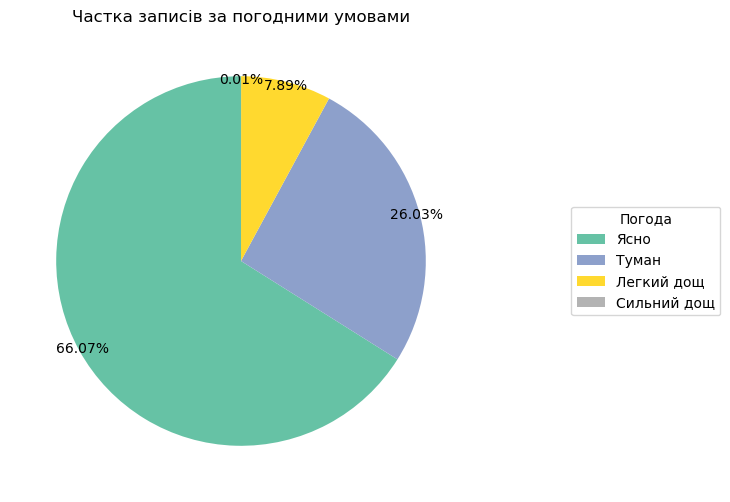

In [56]:
ax = weather_counts.plot(
    kind="pie",
    autopct="%.2f%%",
    startangle=90,
    colormap="Set2",
    ylabel="",
    figsize=(8,6),
    pctdistance=0.98)

ax.set_title("Частка записів за погодними умовами")

ax.legend(
    title="Погода",
    bbox_to_anchor=(1.2, 0.5),
    loc="center left")

for t in ax.texts:
    if "%" not in t.get_text():
        t.set_text("")

- Яка погода переважає в датасеті?
Ясно.
- Чи є дні із сильним дощем? Яка їх частка?
Є, але їхня частка мала - 0,01%.
- Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?
Як уже зазаначалося вище, ясна погода - вищий попит, погана погода - нижчий попит.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

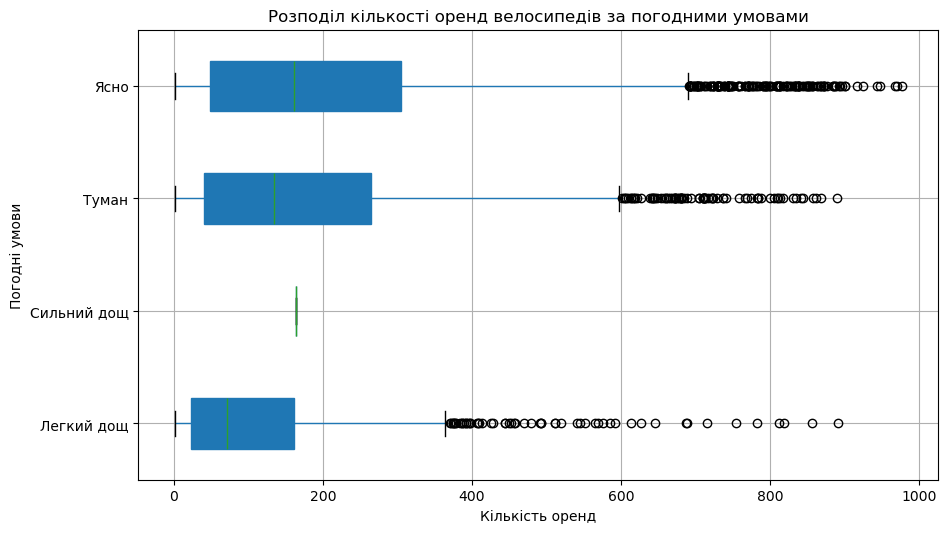

In [58]:
ax = df.boxplot(
    column="total_rentals",
    by="Погода",
    vert=False,      
    figsize=(10,6),
    grid=True,
    patch_artist=True 
)

ax.set_title("Розподіл кількості оренд велосипедів за погодними умовами")
plt.suptitle("")
ax.set_xlabel("Кількість оренд")
ax.set_ylabel("Погодні умови");

- При якій погоді найбільший розкид у кількості оренди?
При ясній.
- Чи є викиди (outliers) в даних? При якій погоді?
Викиди є при всіх погодніх умовах, окрім сильного дощу. Кидається в очі, що при легкому дощу часті високі викиди, думаю це обумвлено тим, що легкий дощ влітку може не заважати деяким користувачам, оскільки, на фоні теплої погоди, він відчувається приємно.
- При якій погоді медіанне значення оренди найвище?
При ясній погоді, що логічно, у цей період велосипеди орендують найчастіше.

Очікуваний результат:

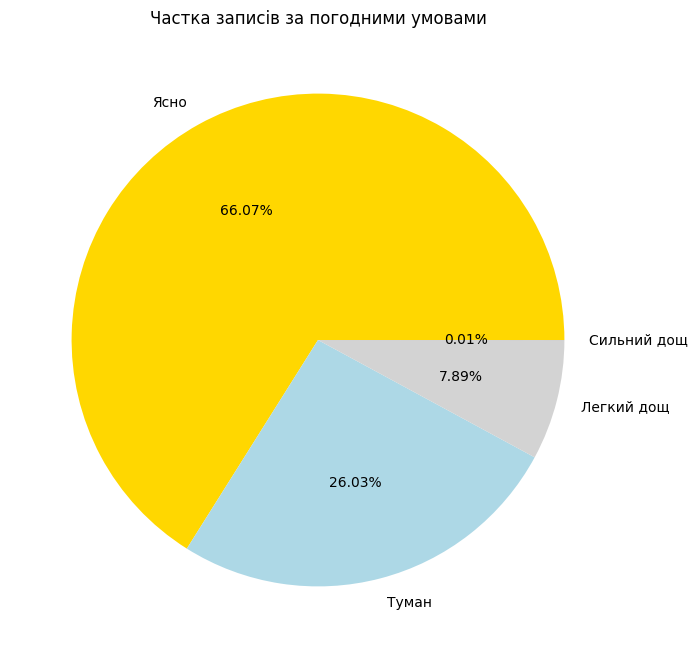

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

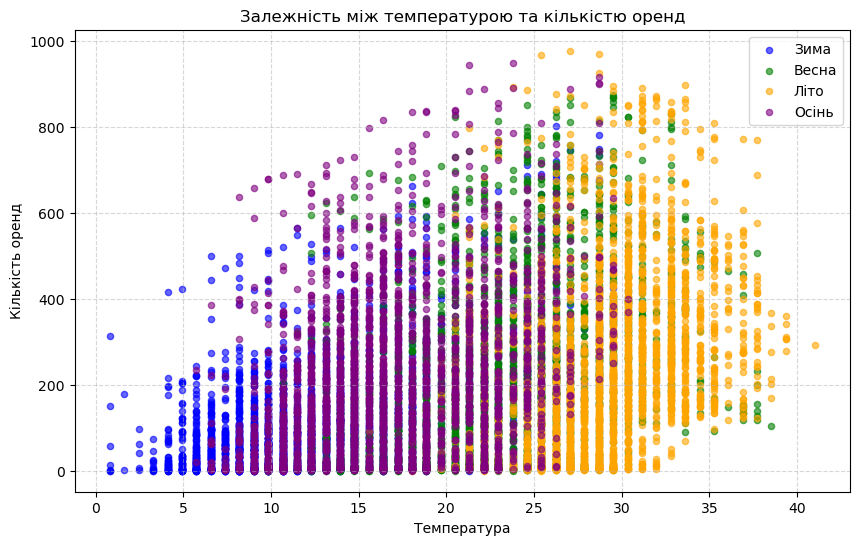

In [62]:
ax = None
colors = {"Зима":"blue", "Весна":"green", "Літо":"orange", "Осінь":"purple"}

for season, color in colors.items():
    ax = df[df["Сезон"] == season].plot(
        kind="scatter",
        x="temp", y="count",
        alpha=0.6,
        color=color,
        label=season,
        ax=ax,             # малюємо все на одній осі
        figsize=(10,6),
        title="Залежність між температурою та кількістю оренд"
    )

ax.set_xlabel("Температура")
ax.set_ylabel("Кількість оренд")
ax.grid(True, linestyle="--", alpha=0.5)

- Чи є зв'язок між температурою та кількістю оренди? Який?
Так, зв'язок є і він близький до прямопропорційного: до 30 градусів зростання температури підвищує попит на оренду, після 30 спостерігаємо зниження, оскільки в сильну спеку зростає ризик перегріву та і взагалі кататися не так комфортно.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [69]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["weekday"] = pd.Categorical(df["weekday"], categories=days, ordered=True)
grouped = (
    df.groupby("weekday", observed=True)[["casual","registered"]]
      .mean()
      .reindex(days))

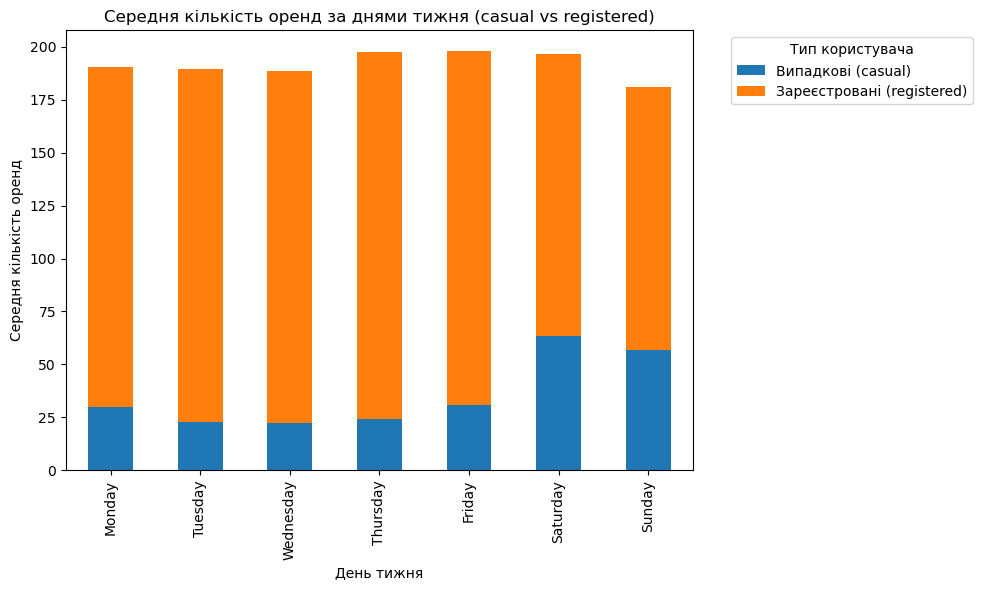

In [70]:
ax = grouped.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=["#1f77b4", "#ff7f0e"])

ax.set_title("Середня кількість оренд за днями тижня (casual vs registered)")
ax.set_xlabel("День тижня")
ax.set_ylabel("Середня кількість оренд")

ax.legend(
    title="Тип користувача", 
    labels=["Випадкові (casual)", "Зареєстровані (registered)"],
    bbox_to_anchor=(1.05, 1),
    loc="upper left")

plt.tight_layout()
plt.show()

- В які дні тижня більше оренд від зареєстрованих користувачів?
У будні (особливо в четвер і п’ятницю).
- Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?
Це пов’язано з тим, що зареєстровані користувачі найчастіше орендують велосипеди для щоденного транспортування (наприклад, на роботу/навчання). У суботу та неділю багато людей беруть велосипеди для відпочинку, прогулянок або коротких поїздок у вільний час, тому і зростає частка випадкових користувачів.